In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
from puzzles import load_array, load_lines

import numpy as np

import matplotlib.pyplot as plt

In [3]:
cmds = load_lines(12)

In [18]:
def turn_cw(v):
    return {
        (1, 0): (0, 1),  # up -> right
        (0, 1): (-1, 0),  # right -> down
        (-1, 0): (0, -1),  # down -> left
        (0, -1): (1, 0),  # left -> up
    }[v]


def turn_ccw(v):
    return {
        (0, 1): (1, 0),  # up <- right
        (-1, 0): (0, 1),  # right <- down
        (0, -1): (-1, 0),  # down <- left
        (1, 0): (0, -1),  # left <- up
    }[v]


directions = {
    "N": (1, 0),
    "S": (-1, 0),
    "W": (0, -1),
    "E": (0, 1),
}

In [19]:
sailing_history = []

facing = (0, 1)
coords = np.array([0, 0])

for cmd in cmds:
    c, n = cmd[:1], int(cmd[1:])
    if c == "F":
        for _ in range(n):
            coords = coords + np.array(facing)
            sailing_history.append(coords)
    elif c == "R":
        for _ in range(n // 90):
            facing = turn_cw(facing)
    elif c == "L":
        for _ in range(n // 90):
            facing = turn_ccw(facing)
    else:
        for _ in range(n):
            coords = coords + np.array(directions[c])
            sailing_history.append(coords)

In [20]:
np.abs(coords).sum()

562

In [21]:
sailing_history = np.array(sailing_history)

In [22]:
sailing_history.shape

(10058, 2)

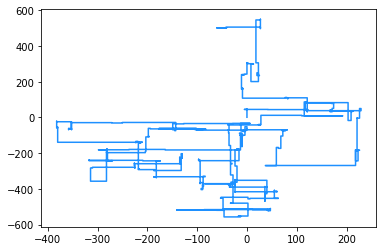

In [24]:
plt.plot(sailing_history[:, 0], sailing_history[:, 1], c="dodgerblue")

---

In [26]:
def turn_ccw(v):
    a, b = v
    return np.array([b, -a])


def turn_cw(v):
    a, b = v
    return np.array([-b, a])

In [27]:
sailing_history = []

waypoint = np.array([1, 10])
coords = np.array([0, 0])

for cmd in cmds:
    c, n = cmd[:1], int(cmd[1:])
    if c == "F":
        for _ in range(n):
            coords = coords + waypoint
            sailing_history.append(coords)
    elif c == "R":
        for _ in range(n // 90):
            waypoint = turn_cw(waypoint)
    elif c == "L":
        for _ in range(n // 90):
            waypoint = turn_ccw(waypoint)
    else:
        for _ in range(n):
            waypoint = waypoint + np.array(directions[c])
            sailing_history.append(coords)

In [28]:
np.abs(coords).sum()

101860

In [30]:
sailing_history = np.array(sailing_history)

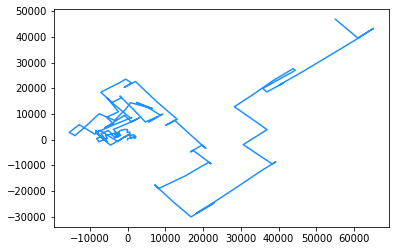

In [31]:
plt.plot(sailing_history[:, 0], sailing_history[:, 1], c="dodgerblue")